In [2]:
!gdown --id 1hWaQANWpYPxQobjFPWjaUQam6aODAQz1

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hWaQANWpYPxQobjFPWjaUQam6aODAQz1
To: /content/linear_regression_dataset.zip
100% 7.82k/7.82k [00:00<00:00, 17.1MB/s]


In [3]:
import zipfile
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf

# Extract the archive
zip_ref = zipfile.ZipFile('linear_regression_dataset.zip', 'r')
zip_ref.extractall('linear_regression_dataset')
zip_ref.close()

In [5]:
train_data = pd.read_csv('linear_regression_dataset/train.csv')
test_data = pd.read_csv('linear_regression_dataset/test.csv')

# Showing row contains NaN
print("\nRow contains NaN:")
print(train_data[train_data.isnull().any(axis=1)])

print("\nRow contains NaN:")
print(test_data[test_data.isnull().any(axis=1)])

# Drop row contains NaN
df_cleaned = train_data.dropna()

x_train = df_cleaned[['x']]
y_train = df_cleaned['y']

x_test = test_data[['x']]
y_test = test_data['y']


Row contains NaN:
               x   y
213  3530.157369 NaN

Row contains NaN:
Empty DataFrame
Columns: [x, y]
Index: []


**Scikit-learn Linear Regression**

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'mean squared error : {mse}')

print(f'model koefisien : {model.coef_}')
print(f'model intercept : {model.intercept_}')

mean squared error : 9.432922192039305
model koefisien : [1.00065638]
model intercept : -0.10726546430097272


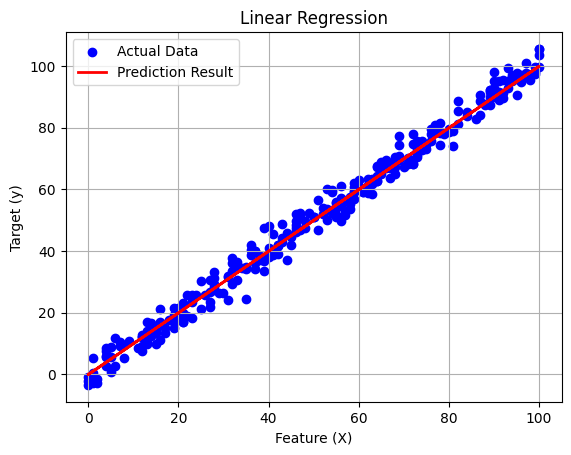

In [7]:
# Plot actual Data
plt.scatter(x_test, y_test, color='blue', label='Actual Data')

# Plot prediction result from model
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Prediction Result')

plt.title('Linear Regression')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)
plt.show()

**Tensorflow Linear Regression**

In [8]:
# Train model using Sequential single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

model.compile(optimizer='RMSProp', loss='mean_squared_error')
model.fit(x_train, x_train, epochs=200)

Epoch 1/200
22/22 [==============================] - 1s 3ms/step - loss: 4766.5884
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 4576.2896
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 4405.7329
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 4238.5664
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 4077.0417
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 3920.2747
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 3761.2583
Epoch 8/200
22/22 [==============================] - 0s 3ms/step - loss: 3608.6121
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 3457.0876
Epoch 10/200
22/22 [==============================] - 0s 3ms/step - loss: 3310.4307
Epoch 11/200
22/22 [==============================] - 0s 2ms/step - loss: 3167.4316
Epoch 12/200
22/22 [==============================] - 0s 3ms/step - loss: 3027.4578
E

In [9]:
# Prediction using test data
y_pred = model.predict(x_test).flatten()

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Showing bias and weight
weights, bias = model.layers[0].get_weights()
print(f'Koefisien: {weights[0][0]}')
print(f'Intercept: {bias[0]}')

10/10 [==============================] - 0s 2ms/step
Mean Squared Error: 9.426125659940423
Koefisien: 0.9995625615119934
Intercept: -0.0010719336569309235


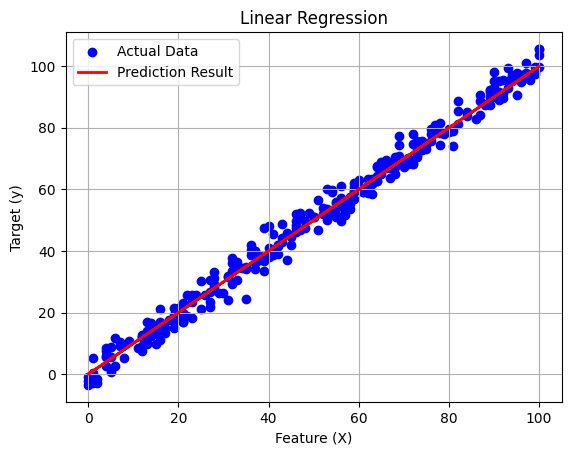

In [10]:
# Plot actual Data
plt.scatter(x_test, y_test, color='blue', label='Actual Data')

# Plot prediction result from model
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Prediction Result')

plt.title('Linear Regression')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)
plt.show()